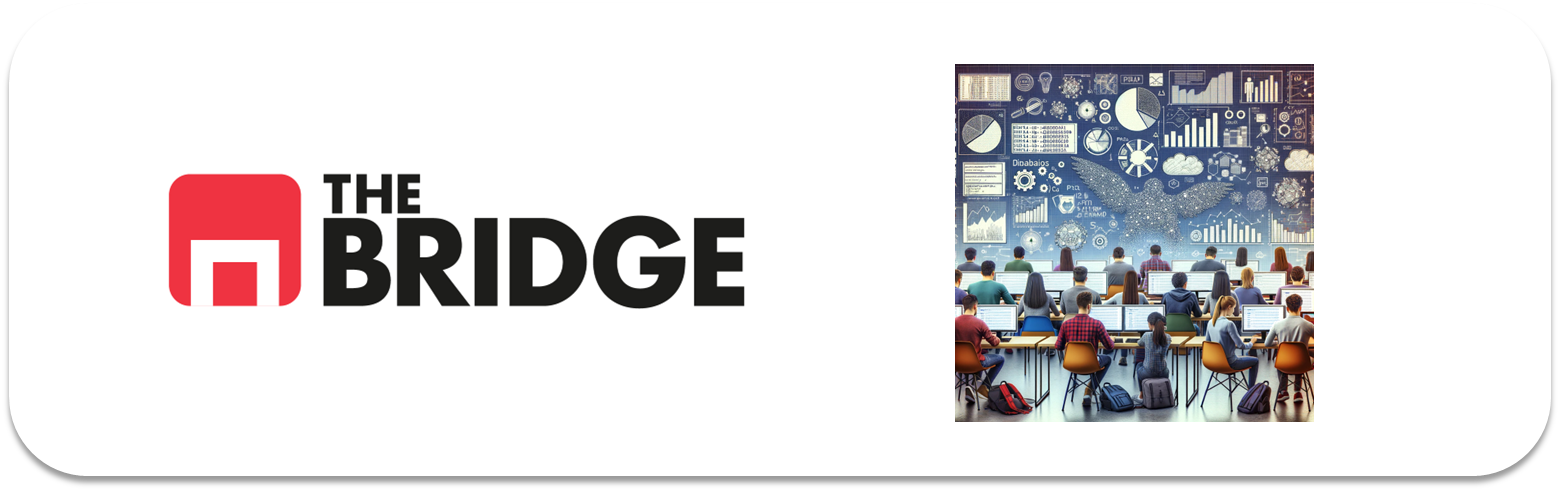

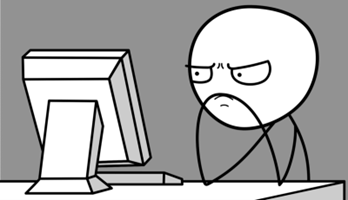

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bootcampviztools as bvt
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
df_inmo = pd.read_csv("./data/Advertising_ml.csv")
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [3]:
df_inmo['Timestamp'] = pd.to_datetime(df_inmo['Timestamp'])
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   object        
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 78.3+ KB


In [4]:
df_inmo.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df_inmo.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,13414.634022,43.902339,0.499889,NaN,0.50025


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

- **Tipo de problema**: Categorización (Quien pulsa o no en el anuncio)
- **Tipo de aprendizaje**: Supervisado (Porque tenemos un target)
- **Variable target**: Clicked on Ad 

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definición de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [6]:
bvt.cardinalidad(df_inmo)

,Columna,Card,%_Card,Tipo,Clasificada_como
0,Daily Time Spent on Site,900,90.0,float64,Numerica Continua
1,Age,83,8.3,object,Numerica Discreta
2,Area Income,1000,100.0,float64,Numerica Continua
3,Daily Internet Usage,966,96.6,float64,Numerica Continua
4,Ad Topic Line,1000,100.0,object,Numerica Continua
5,City,969,96.9,object,Numerica Continua
6,Male,2,0.2,int64,Binaria
7,Country,237,23.7,object,Numerica Discreta
8,Timestamp,1000,100.0,datetime64[ns],Numerica Continua
9,Clicked on Ad,2,0.2,int64,Binaria


- Las variables **Age** (Podriamos transformarla en numérica) y **Country** podriamos considerarlas igualmente como categoricas

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [7]:
df_inmo["Age"] = df_inmo.Age.str.replace(r"[year|años]","", regex= True).astype(int) 
# Reemplazar los años/years por nada y convertir a entero a traves del uso de expresiones regulares

In [12]:
df_inmo.Age.unique()

array([35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 24, 41, 36, 40, 52, 28,
       34, 22, 57, 53, 39, 46, 32, 25, 43, 45, 50, 47, 27, 42, 38, 54, 21,
       60, 55, 44, 58, 56, 51, 19, 59, 61])

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [13]:
train_set, test_set = train_test_split(df_inmo, test_size = 0.2, random_state = 42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

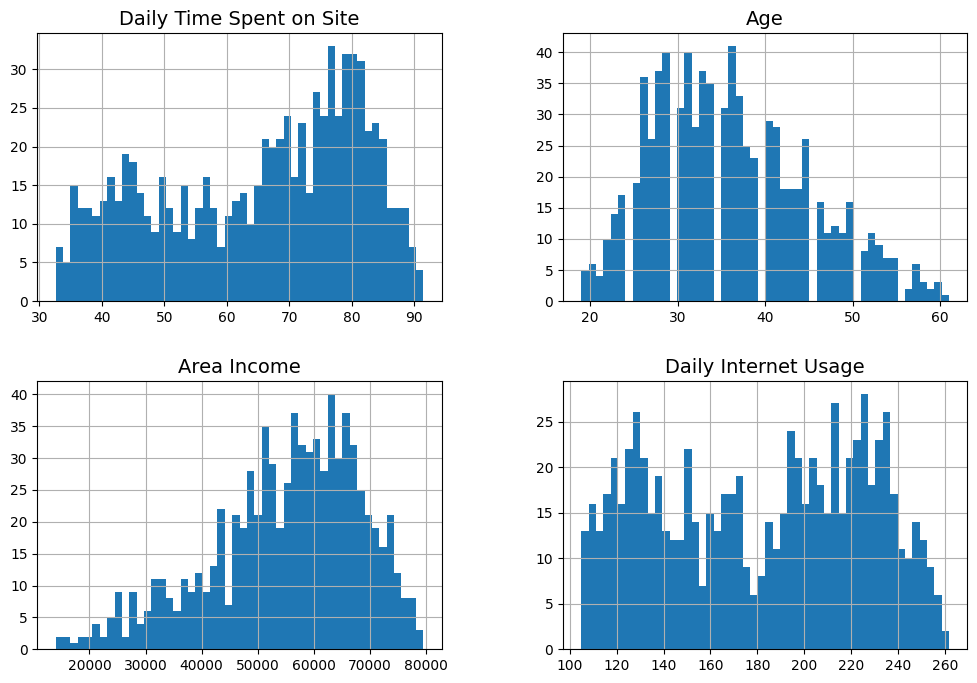

In [15]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage"]].hist(bins=50, figsize=(12, 8))
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

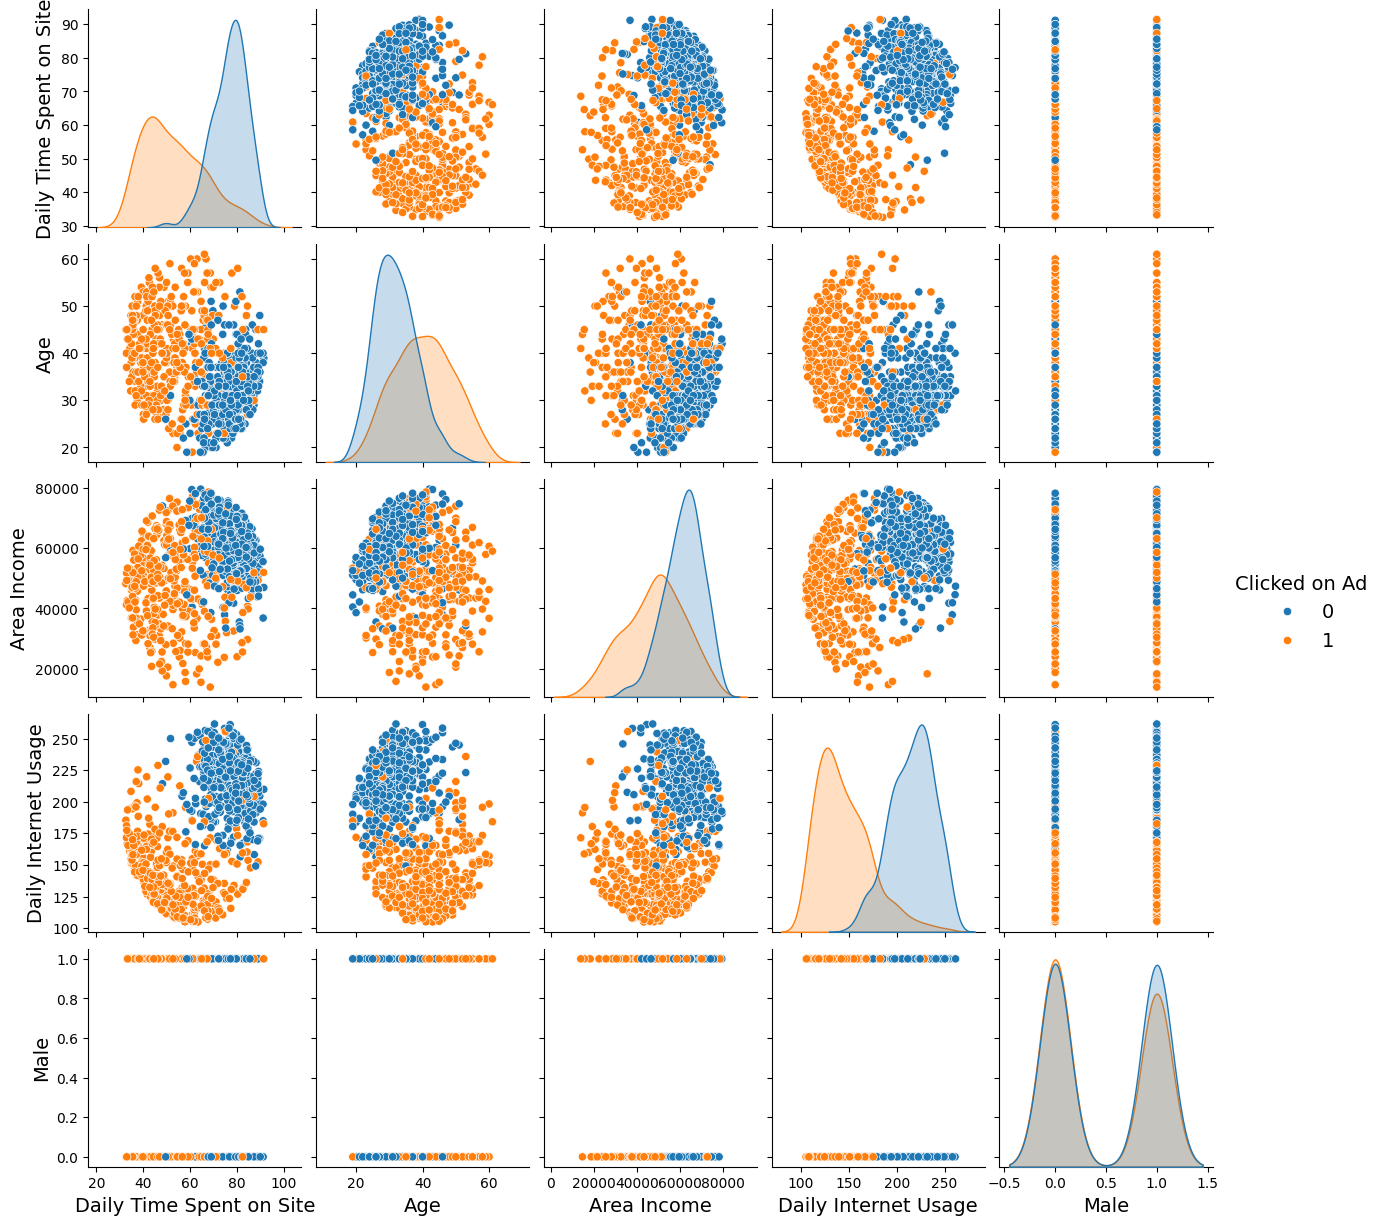

In [17]:
sns.pairplot(train_set, hue = "Clicked on Ad")
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selección de features:

- Nos quedamos con: 
    - Age 
    - Area Income 
    - Daily Internet Usage 
    - Daily Time Spent on Site

- Descartamos:
    * Male

Esto debido a que en teoria al male superponerse ambos graficos, puede significar que estas se comportan igual, a diferencia de las otras 4 variables que si podrian servir para hacer un analisis predictivo.